
Ten Chicago Blocks With Highest Crimes Reported:

Block:  001XX N STATE ST 
Occurences: 1331  
Most Common Offenses: THEFT , DECEPTIVE PRACTICE 
Most Common Locations: DEPARTMENT STORE , SMALL RETAIL STORE 

Block:  008XX N MICHIGAN AVE 
Occurences: 641  
Most Common Offenses: THEFT , DECEPTIVE PRACTICE 
Most Common Locations: DEPARTMENT STORE , SMALL RETAIL STORE 

Block:  0000X S STATE ST 
Occurences: 606  
Most Common Offenses: THEFT , DECEPTIVE PRACTICE 
Most Common Locations: DEPARTMENT STORE , SMALL RETAIL STORE 

Block:  0000X W TERMINAL ST 
Occurences: 557  
Most Common Offenses: THEFT , CRIMINAL TRESPASS 
Most Common Locations: AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA , AIRPORT TERMINAL UPPER LEVEL - SECURE AREA 

Block:  0000X N STATE ST 
Occurences: 551  
Most Common Offenses: THEFT , DECEPTIVE PRACTICE 
Most Common Locations: DEPARTMENT STORE , SMALL RETAIL STORE 

Block:  011XX S CANAL ST 
Occurences: 410  
Most Common Offenses: THEFT , DECEPTIVE PRACTICE 
Most Comm

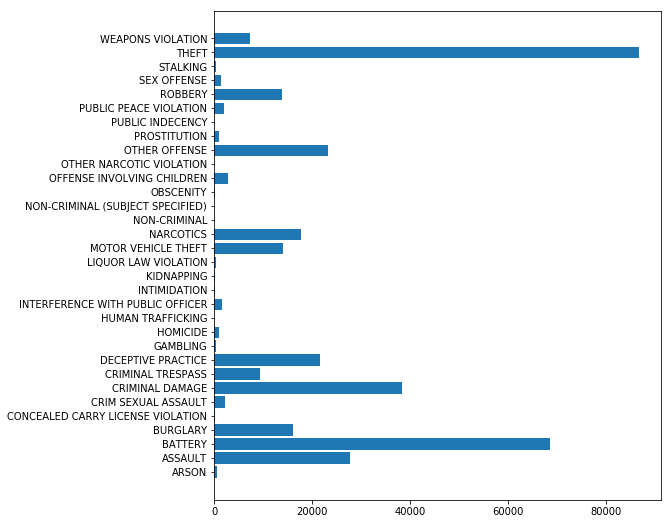

Total Amount of Crimes Committed: 359044


In [66]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt, pylab

#constants to quickly references the columns
BLOCK = 'Block'
PRIMARYTYPE = 'Primary Type'
LOCATIONDESCRIPTION = 'Location Description'

#function to read the crime statistics file and return
#a clean dataframe
def getCleanCrimeData():
    data = pd.read_csv('Crimes_-_2017_to_present.csv')
    data = data.dropna()
    return data

#Each problem should be kept in a function, Example
#function below in which takes in a dataframe and prints
#the data types
def funcExample(data):
    print(data.dtypes)

#Gather 10 most dangerous areas, display occurences, and top crimes committed
def topCrimeBlocks(npdata):
    
    #returns 2 arrays, one for all blocks, another for number of times
    #blocks appear
    allBlocks, counts = np.unique(npdata[BLOCK], return_counts=True)
    print("\nTen Chicago Blocks With Highest Crimes Reported:\n")
    
    #finds and prints 10 most crime ridden blocks and 2 most common offenses
    for i in range(0,10):
        
        #gets most common crime and location
        blockIndex = counts.argmax()
        total = counts[blockIndex]
        block = allBlocks[blockIndex]
        
        #delete crime/location to not allow duplicates
        counts = np.delete(counts,blockIndex)
        allBlocks = np.delete(allBlocks,blockIndex)
        
        #get most common crime in specific location
        crimes = npdata[npdata[BLOCK]==block]
        allCrimes, c = np.unique(crimes[PRIMARYTYPE], return_counts=True)
        
        #find 2 most common crimes, delete entries to not allow duplicates
        crimeIndex = c.argmax()
        offense1 = allCrimes[crimeIndex]
        c = np.delete(c,crimeIndex)
        allCrimes = np.delete(allCrimes,crimeIndex)
        crimeIndex = c.argmax()
        offense2 = allCrimes[crimeIndex]
        
        #get most common location of crimes
        location = npdata[npdata[BLOCK]==block]
        allLocations, co = np.unique(crimes[LOCATIONDESCRIPTION], return_counts=True)
        
        #find 2 most location of crimes, delete entries to not allow duplicates
        localIndex = co.argmax()
        location1 = allLocations[localIndex]
        co = np.delete(co,localIndex)
        allLocations = np.delete(allLocations,localIndex)
        localIndex = co.argmax()
        location2 = allLocations[localIndex]
        
        #print results
        print("Block: ",block,"\nOccurences:",total," \nMost Common Offenses:",offense1,",",offense2,"\nMost Common Locations:",location1,",",location2,"\n")
        
def leastCrimeBlocks(npdata):
    
    #returns 2 arrays, one for all blocks, another for number of times
    #blocks appear
    allBlocks, counts = np.unique(npdata[BLOCK], return_counts=True)
    
    al = np.array(['0'])
    
    #finds and prints 10 most crime ridden blocks
    for i in range(0,100):
        blockIndex = counts.argmin()
        total = counts[blockIndex]
        block = allBlocks[blockIndex]
        
        crimes = npdata[npdata[BLOCK]==block]
        al = np.append(al,crimes[PRIMARYTYPE])
        allC = np.unique(al)
    
    allC = ' '.join(allC[1:])
    print("Most Common Crime Among 100 Least Dangerous Areas:",allC)

#create bar chart of total offenses
def barOffenses(npdata):
    
    allCrimes, c = np.unique(npdata[PRIMARYTYPE], return_counts=True)
    
    plt.figure(figsize=(8,9))
    plt.barh(allCrimes,c)
    plt.show()
    print("Total Amount of Crimes Committed:",c.sum())
    
#main function in which runs all functions, no logic in main only reference
#to another function

#when pushing to the repo make sure to comment our your function
#at the end we can uncomment and run. 
def main():
    # only read from file once, use data in other functions
    data = getCleanCrimeData()
    
    #example function for each problem
    #funcExample(data)
    
    topCrimeBlocks(data)
    leastCrimeBlocks(data)
    barOffenses(data)

if __name__ == "__main__":
    main()
